In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

In [ ]:
data = pd.read_csv("CarPricePrediction.csv")
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [ ]:
data.shape

(205, 26)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [ ]:
data.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [ ]:
data.describe().round(3)

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000,205.000,205.000,205.000,205.000,205.000,205.000,205.000,205.000,205.000,205.000,205.000,205.000,205.000,205.000,205.000
mean,103.000,0.834,98.757,174.049,65.908,53.725,2555.566,126.907,3.330,3.255,10.143,104.117,5125.122,25.220,30.751,13276.711
std,59.323,1.245,6.022,12.337,2.145,2.444,520.680,41.643,0.271,0.314,3.972,39.544,476.986,6.542,6.886,7988.852
min,1.000,-2.000,86.600,141.100,60.300,47.800,1488.000,61.000,2.540,2.070,7.000,48.000,4150.000,13.000,16.000,5118.000
25%,52.000,0.000,94.500,166.300,64.100,52.000,2145.000,97.000,3.150,3.110,8.600,70.000,4800.000,19.000,25.000,7788.000
50%,103.000,1.000,97.000,173.200,65.500,54.100,2414.000,120.000,3.310,3.290,9.000,95.000,5200.000,24.000,30.000,10295.000
75%,154.000,2.000,102.400,183.100,66.900,55.500,2935.000,141.000,3.580,3.410,9.400,116.000,5500.000,30.000,34.000,16503.000
max,205.000,3.000,120.900,208.100,72.300,59.800,4066.000,326.000,3.940,4.170,23.000,288.000,6600.000,49.000,54.000,45400.000


In [ ]:
data.drop(columns="car_ID",inplace=True)


In [ ]:
object_cols = data.select_dtypes(include="object").columns
data[object_cols] = data[object_cols].astype("string")
data.dtypes

symboling             int64
CarName              string
fueltype             string
aspiration           string
doornumber           string
carbody              string
drivewheel           string
enginelocation       string
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           string
cylindernumber       string
enginesize            int64
fuelsystem           string
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

In [ ]:
categorical_cols = list(data.select_dtypes(include="string").columns)
print(categorical_cols)

['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem']


In [ ]:
numerical_cols = list(data.select_dtypes(exclude="string").columns)
print(numerical_cols)

['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']


In [ ]:
data.nunique()

symboling             6
CarName             147
fueltype              2
aspiration            2
doornumber            2
carbody               5
drivewheel            3
enginelocation        2
wheelbase            53
carlength            75
carwidth             44
carheight            49
curbweight          171
enginetype            7
cylindernumber        7
enginesize           44
fuelsystem            8
boreratio            38
stroke               37
compressionratio     32
horsepower           59
peakrpm              23
citympg              29
highwaympg           30
price               189
dtype: int64

In [ ]:
data.corr(method="pearson", numeric_only=True)

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
symboling,1.000000,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.130051,-0.008735,-0.178515,0.070873,0.273606,-0.035823,0.034606,-0.079978
wheelbase,-0.531954,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
carlength,-0.357612,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920
carwidth,-0.232919,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325
carheight,-0.541038,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.119336
curbweight,-0.227691,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.835305
enginesize,-0.105790,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.874145
boreratio,-0.130051,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012,0.553173
stroke,-0.008735,0.160959,0.129533,0.182942,-0.055307,0.168790,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,-0.042145,-0.043931,0.079443
compressionratio,-0.178515,0.249786,0.158414,0.181129,0.261214,0.151362,0.028971,0.005197,0.186110,1.000000,-0.204326,-0.435741,0.324701,0.265201,0.067984


Text(0.5, 1.0, 'Correlation of numerical attributes with CarPrice')

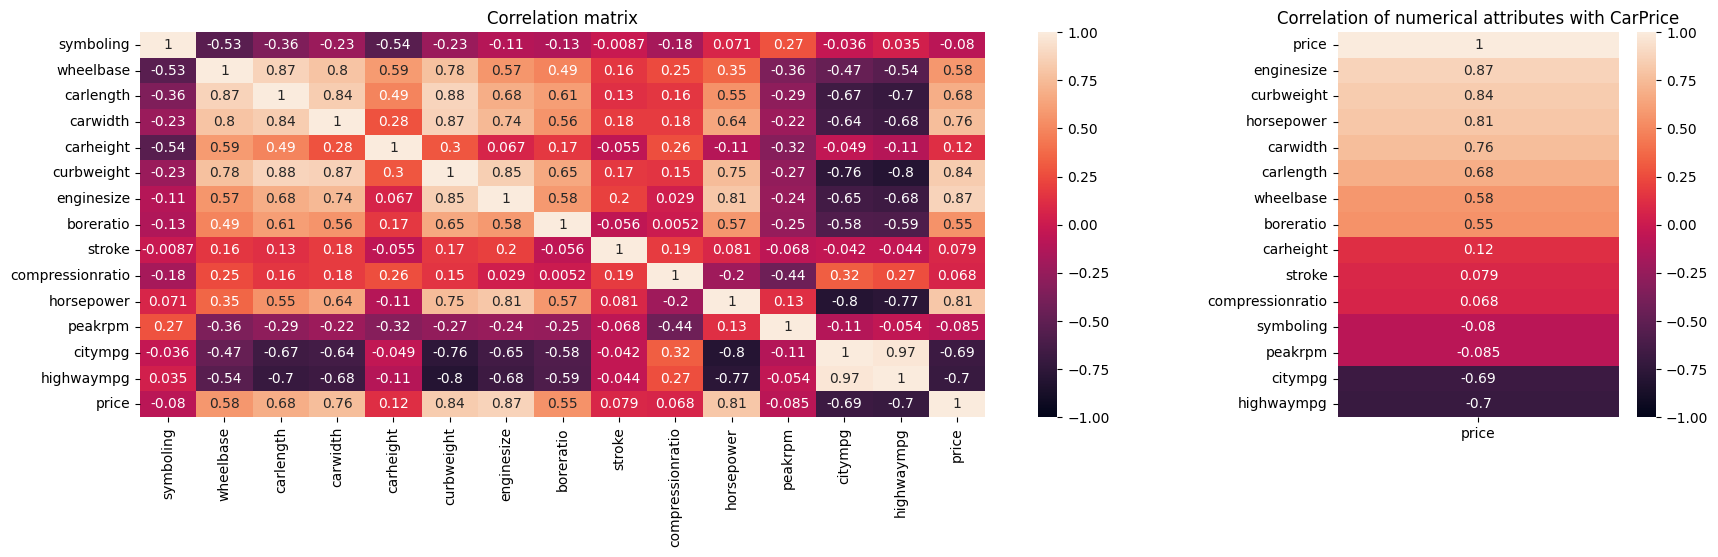

In [ ]:
f, axs = plt.subplots(1, 2, figsize=(20, 5), width_ratios=[3, 1])

sns.heatmap(data=data.corr(method="pearson", numeric_only=True), vmin=-1, vmax=1, annot=True, ax=axs[0])
axs[0].set_title("Correlation matrix")

sns.heatmap(data=data.corr(method="pearson", numeric_only=True)[["price"]].sort_values('price', ascending=False), vmin=-1, vmax=1, annot=True, ax=axs[1])
axs[1].set_title("Correlation of numerical attributes with CarPrice")

In [ ]:
plt.figure(figsize=(20, 10))
fig = px.histogram(data_frame=data, x="horsepower", nbins=15, title="Distribution of Horsepower")
fig.update_traces(marker={"color": "red", "opacity": 0.6, "line": {"width": 4, "color": "black"}})
fig.show()


<Figure size 2000x1000 with 0 Axes>

In [ ]:
plt.figure(figsize=(20, 10))
fig = px.histogram(data_frame=data, x="CarName", nbins=15, title="Distribution of Carname")
fig.update_traces(marker={"color": "blue", "opacity": 0.6, "line": {"width": 1, "color": "black"}})
fig.show()

<Figure size 2000x1000 with 0 Axes>

Text(0.5, 1.0, 'show which more using Fuel Type ')

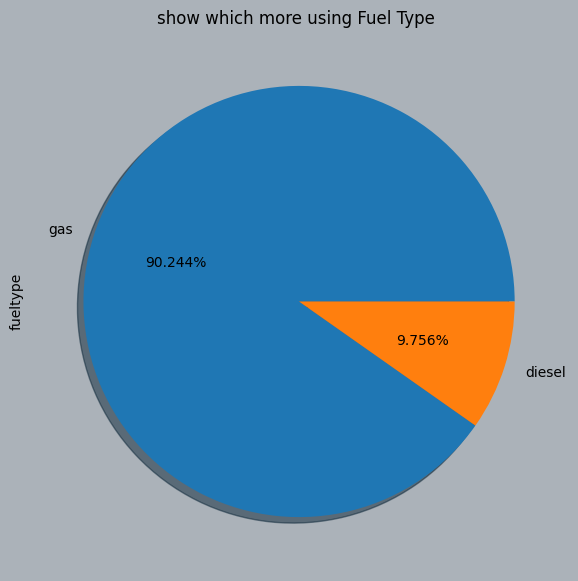

In [ ]:
plt.figure(figsize = [7, 7], clear = True, facecolor = "#ABB2B9")
data["fueltype"].value_counts().plot.pie( autopct='%1.3f%%', shadow = True);
plt.title("show which more using Fuel Type ")

In [ ]:
plt.figure(figsize=(20, 10))
fig = px.histogram(data_frame=data, x="carbody", nbins=15, title="Distribution of Car Body")
fig.update_traces(marker={"color": "blue", "opacity": 0.6, "line": {"width": 1, "color": "black"}})
fig.show()

<Figure size 2000x1000 with 0 Axes>


# Training the dataset

In [ ]:
new_data=data.copy()

In [ ]:
data_n=new_data[numerical_cols]
data_c=new_data[categorical_cols]


In [ ]:
label_encoders = {}
for column in categorical_cols:
    label_encoders[column] = LabelEncoder()
    data_c[column] = label_encoders[column].fit_transform(data_c[column])


<ipython-input-237-917881a5bc88>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-237-917881a5bc88>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-237-917881a5bc88>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-237-917

In [ ]:
print(data_c)

     CarName  fueltype  aspiration  doornumber  carbody  drivewheel  \
0          2         1           0           1        0           2   
1          3         1           0           1        0           2   
2          1         1           0           1        2           2   
3          4         1           0           0        3           1   
4          5         1           0           0        3           0   
..       ...       ...         ...         ...      ...         ...   
200      139         1           0           0        3           2   
201      138         1           1           0        3           2   
202      140         1           0           0        3           2   
203      142         0           1           0        3           2   
204      143         1           1           0        3           2   

     enginelocation  enginetype  cylindernumber  fuelsystem  
0                 0           0               2           5  
1                 0    

In [ ]:
fm = [data_c, data_n]

data1 = pd.concat(fm,axis=1)
data1.head()

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem,...,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,2,1,0,1,0,2,0,0,2,5,...,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,1,0,1,0,2,0,0,2,5,...,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,1,0,1,2,2,0,5,3,5,...,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,1,0,0,3,1,0,3,2,5,...,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,1,0,0,3,0,0,3,1,5,...,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CarName           205 non-null    int64  
 1   fueltype          205 non-null    int64  
 2   aspiration        205 non-null    int64  
 3   doornumber        205 non-null    int64  
 4   carbody           205 non-null    int64  
 5   drivewheel        205 non-null    int64  
 6   enginelocation    205 non-null    int64  
 7   enginetype        205 non-null    int64  
 8   cylindernumber    205 non-null    int64  
 9   fuelsystem        205 non-null    int64  
 10  symboling         205 non-null    int64  
 11  wheelbase         205 non-null    float64
 12  carlength         205 non-null    float64
 13  carwidth          205 non-null    float64
 14  carheight         205 non-null    float64
 15  curbweight        205 non-null    int64  
 16  enginesize        205 non-null    int64  
 1

In the below box, I have taken only these parameters because they have a high correlation with the price hence it leads to good results. Correlation can be studied using the heatmap I made above.

In [ ]:
data1=data1[["highwaympg","citympg","CarName",'enginelocation','fuelsystem','boreratio','wheelbase','drivewheel','carlength','carwidth','horsepower','curbweight','enginesize','price']]

data1.head()

,highwaympg,citympg,CarName,enginelocation,fuelsystem,boreratio,wheelbase,drivewheel,carlength,carwidth,horsepower,curbweight,enginesize,price
0,27,21,2,0,5,3.47,88.6,2,168.8,64.1,111,2548,130,13495.0
1,27,21,3,0,5,3.47,88.6,2,168.8,64.1,111,2548,130,16500.0
2,26,19,1,0,5,2.68,94.5,2,171.2,65.5,154,2823,152,16500.0
3,30,24,4,0,5,3.19,99.8,1,176.6,66.2,102,2337,109,13950.0
4,22,18,5,0,5,3.19,99.4,0,176.6,66.4,115,2824,136,17450.0


Splitting the data in train and test and applying feature scaling

In [ ]:
X = data1.drop(columns="price")
y = data1["price"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)


In [ ]:

print("X Train : ", X_train.shape)
print("X Test  : ", X_test.shape)
print("Y Train : ", y_train.shape)
print("Y Test  : ", y_test.shape)

X Train :  (164, 13)
X Test  :  (41, 13)
Y Train :  (164,)
Y Test  :  (41,)


In [ ]:
Scaler= StandardScaler()
X_train=Scaler.fit_transform(X_train)
X_test=Scaler.transform(X_test)

In [ ]:
print(X_train)
print(X_test)

[[ 1.3135007   0.96431609 -0.42008686 ... -0.81538553  0.28128677
   0.18801047]
 [-1.02456857 -0.98812636  0.19350635 ... -0.24189416  1.01604452
  -0.15899277]
 [ 1.00175813  0.96431609  1.07708056 ... -1.0647296  -0.54164191
  -0.85299925]
 ...
 [ 1.00175813  0.96431609 -0.02738721 ... -0.89018875 -1.21174098
  -0.72906952]
 [-1.02456857 -0.98812636  1.05253683 ...  1.40377672  0.90044264
   1.10509046]
 [-1.33631113 -1.31353343 -0.12556212 ...  1.17936706  1.44906176
   1.35294991]]
[[-1.33631113 -1.47623697 -1.57364209 -0.13650473  0.85588374  1.11230832
   0.80181738  1.19131812  1.23488746  0.4617128   1.92739928  1.31974439
   2.04695639]
 [-1.33631113 -1.47623697 -1.69636073 -0.13650473  0.85588374 -0.70964636
   0.12962287 -2.46057295  0.33814986  0.93408272  1.37884232  0.97293873
   0.11365263]
 [ 0.53414428  0.31350194  0.04624398 -0.13650473 -1.12807291  0.03400861
  -0.25688897 -0.63462741 -0.06040018 -0.34131607 -0.19202534 -0.49853612
  -0.15899277]
 [-0.40108343 -0.66

<h3>Linear Regression</h3>

In [ ]:
from sklearn.linear_model import LinearRegression,ARDRegression

LR = LinearRegression()
LR.fit(X_train,y_train)
preds=LR.predict(X_test)

print("The mean absolute error:\n{}\n".format(mean_absolute_error(y_test, preds)))

Linear_Regression_model_accuracy = r2_score(y_test,preds)*100
print("R2 score:\n{}\n".format(Linear_Regression_model_accuracy))
accuracies = pd.DataFrame({"Algorithm": ["Linear Regression"], "Score":[Linear_Regression_model_accuracy]})
print(accuracies)


The mean absolute error:
2323.1493298834807

R2 score:
85.05307242719104

           Algorithm      Score
0  Linear Regression  85.053072


<h3> Decision Tree Regressor </h3>

In [ ]:
from sklearn.tree import DecisionTreeRegressor
DTR = DecisionTreeRegressor()
DTR.fit(X_train,y_train)
preds=DTR.predict(X_test)

print("The mean absolute error:\n{}\n".format(mean_absolute_error(y_test, preds)))

DecisionTreeRegressor_model_accuracy = r2_score(y_test,preds)*100
print("R2 score:\n{}\n".format(DecisionTreeRegressor_model_accuracy))
accuracies.loc[len(accuracies)]={"Algorithm": "DecisionTreeRegressor", "Score":DecisionTreeRegressor_model_accuracy}


The mean absolute error:
2128.0203170731706

R2 score:
86.76573434179198



<h3> KNeighborsRegressor </h3>

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
KNR = KNeighborsRegressor()
KNR.fit(X_train,y_train)
preds=KNR.predict(X_test)

print("The mean absolute error:\n{}\n".format(mean_absolute_error(y_test, preds)))

KNeighborsRegressor_model_accuracy = r2_score(y_test,preds)*100
print("R2 scoree:\n{}\n".format(KNeighborsRegressor_model_accuracy))
accuracies.loc[len(accuracies)]={"Algorithm": "KNeighborsRegressor", "Score":KNeighborsRegressor_model_accuracy}

The mean absolute error:
1823.38456097561

R2 scoree:
88.16696602108463



<h3>RandomForestRegressor </h3>

In [ ]:
from sklearn.ensemble import RandomForestRegressor
RFR = RandomForestRegressor()
RFR.fit(X_train,y_train)
preds=RFR.predict(X_test)

print("The mean absolute error:\n{}\n".format(mean_absolute_error(y_test, preds)))

RandomForestRegressor_model_accuracy = r2_score(y_test,preds)*100
print("R2 score:\n{}\n".format(RandomForestRegressor_model_accuracy))
accuracies.loc[len(accuracies)]={"Algorithm": "RandomForestRegressor", "Score":RandomForestRegressor_model_accuracy}

The mean absolute error:
1308.0427560975609

R2 score:
95.48877568967411



<h3>XGBRegressor</h3>

In [ ]:
from xgboost import XGBRegressor
XGB = XGBRegressor()
XGB.fit(X_train,y_train)
preds=XGB.predict(X_test)

print("The mean absolute error:\n{}\n".format(mean_absolute_error(y_test, preds)))

XGBRegressor_model_accuracy = r2_score(y_test,preds)*100
print("R2 score:\n{}\n".format(XGBRegressor_model_accuracy))
accuracies.loc[len(accuracies)]={"Algorithm": "XGBRegressor", "Score": XGBRegressor_model_accuracy}

The mean absolute error:
1738.3473940548781

R2 score:
90.6547466672519



In [ ]:
plt.figure(figsize=(20, 10))
fig = px.bar(data_frame=accuracies, x="Algorithm", y="Score", title="R2 Score of Various Algorithms", range_y=[50, 100],)
fig.update_traces(marker={"color": "red", "opacity": 0.6, "line": {"width": 4, "color": "black"}})
fig.show()

<Figure size 2000x1000 with 0 Axes>